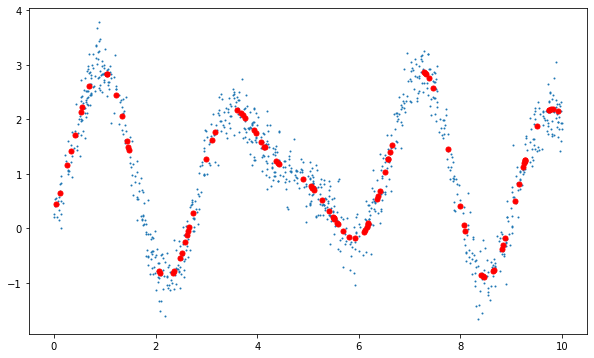

Iteration: 0001 | a: 0.621997 | b: 0.810900 | c: 0.658126 | Training loss: 1.135559 | Testing loss: 1.090012 
Iteration: 0101 | a: 1.410026 | b: -0.187005 | c: 1.014778 | Training loss: 0.364975 | Testing loss: 0.302888 
Iteration: 0201 | a: 1.313107 | b: -0.620954 | c: 0.991874 | Training loss: 0.244002 | Testing loss: 0.045698 
Iteration: 0301 | a: 1.308825 | b: -0.629936 | c: 0.994801 | Training loss: 0.243958 | Testing loss: 0.040795 
Iteration: 0401 | a: 1.308613 | b: -0.629707 | c: 0.994809 | Training loss: 0.243958 | Testing loss: 0.040956 
Iteration: 0501 | a: 1.308633 | b: -0.629878 | c: 0.994958 | Training loss: 0.243958 | Testing loss: 0.040855 
Iteration: 0601 | a: 1.308733 | b: -0.629797 | c: 0.994874 | Training loss: 0.243958 | Testing loss: 0.040890 
Iteration: 0701 | a: 1.308567 | b: -0.629835 | c: 0.994950 | Training loss: 0.243958 | Testing loss: 0.040888 
Iteration: 0801 | a: 1.308770 | b: -0.629800 | c: 0.994887 | Training loss: 0.243958 | Testing loss: 0.040884 
It

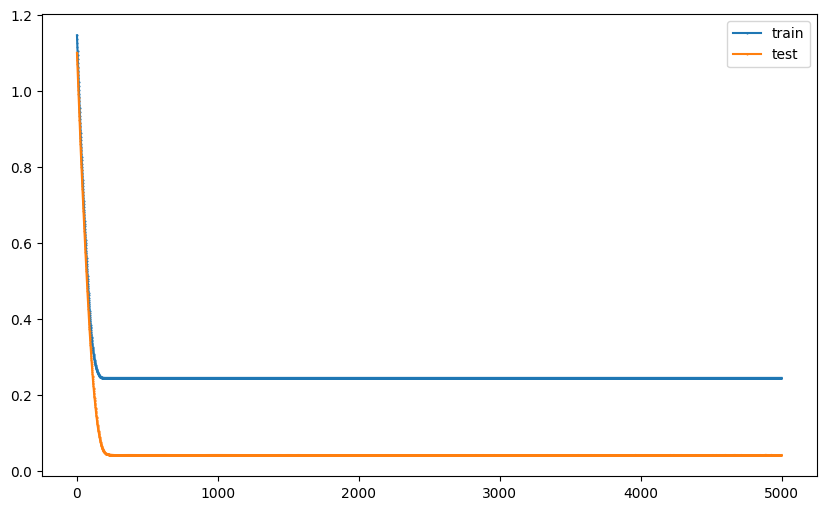

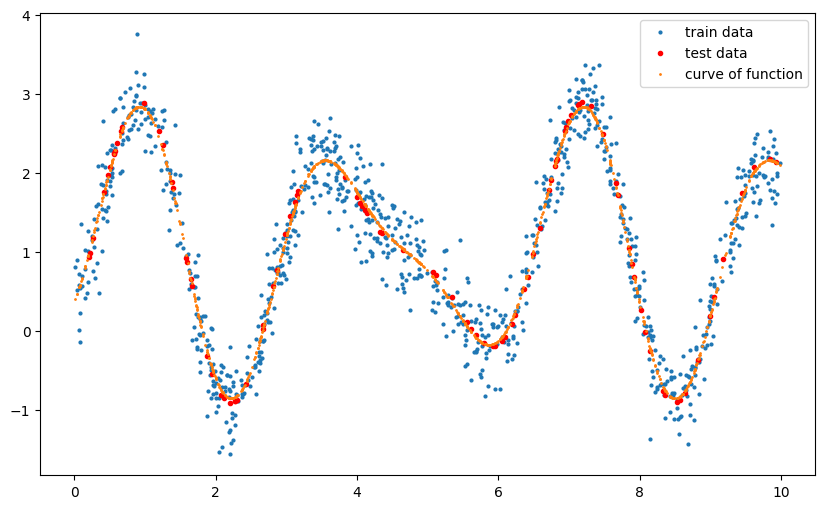

done


In [21]:
import torch
import matplotlib.pyplot as plt
# TODO: (3 points, details are given below): 
# generate 1000 training data pairs and 100 testing data pairs according to the above description.

# generate training data (1 point)
x_tr = torch.rand(1000)*10
y_tr = 1.3*torch.sin(2*x_tr) - 0.7*torch.cos(3*x_tr) + 1 + torch.randn(1000)*0.3

# generate testing data (1 point)
x_t = torch.rand(100)*10
y_t = 1.3*torch.sin(2*x_t) - 0.7*torch.cos(3*x_t) + 1

# draw the data in a single figure (using two different showing styles) (1 point)
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 10})
plt.plot(x_tr, y_tr, marker='o', linestyle='none', markersize=1) 
plt.plot(x_t, y_t, marker='o', linestyle='none', color='red', markersize=5) 
plt.show()
plt.rcParams.update(plt.rcParamsDefault)


data = torch.load('saved_data.pt')
x_train = data['x_train']
y_train = data['y_train']
x_test = data['x_test']
y_test = data['y_test']


# TODO: (3.5 points, details are given below)
import torch.nn as nn

# define a class (0.5) + write the __init__ function (1.5 point) + write the forward function (1.5 points)
class myClassModel(nn.Module):
    def __init__(self):
        super(myClassModel, self).__init__()

        # define the parameters of the model here
        self.a = nn.Parameter(torch.rand(1))
        self.b = nn.Parameter(torch.rand(1))
        self.c = nn.Parameter(torch.rand(1))

    def forward(self, data):
        f = self.a*torch.sin(2*data) + self.b*torch.cos(3*data) + self.c
        return f

    
# TODO: (8.5 points, details are given below)
# Make a instance of the model class (0.5 point)
model = myClassModel()

# create an optimizer, set a workable learing rate (0.5 point + 0.5 point)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)
training_losses = []
testing_losses = []
n_itr = 5000

for i in range(n_itr):
 
    # Train
    model.train() # change model to train mode
    
    # forward propagation
    # calculate the output of model (0.5 point)
    f = model(x_train)
    # calculate loss according to the above equation (0.5 point)
    training_losses.append(torch.mean(torch.abs(y_train - f)))

    # backward propagation 
    # clear old gradients (0.5)
    optimizer.zero_grad()
    # calculate gradients of parameters (1 point)
    training_losses[i].backward()
    # gradient descent algorithm (1 point)
    optimizer.step()
    
    # Evaluate, calculate the testing loss (0.5 point)
    model.eval() # change model to eval mode
    ft = model(x_test)
    testing_losses.append(torch.mean(torch.abs(y_test - ft)))
    
    # clear old gradients (0.5)
    optimizer.zero_grad()
    # calculate gradients of parameters (1 point)
    testing_losses[i].backward()
    
    # print intermediate results in every certain iterations (1 point)
    if i % 100 == 1:
        print('Iteration: %04d | a: %f | b: %f | c: %f | Training loss: %f | Testing loss: %f ' %(i, model.a, model.b, model.c, training_losses[i], testing_losses[i]))


# plot the training losses (0.5 point) and testing losses (0.5 point)
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 10})
plt.plot(training_losses, marker='.', linestyle='solid', markersize=1) 
plt.plot(testing_losses, marker='.', linestyle='solid', markersize=1) 
plt.legend(('train', 'test'), loc='upper right')
plt.show()
plt.rcParams.update(plt.rcParamsDefault)


# plot all the training data, testing data and the curve of function (1 point)
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 10})
plt.plot(x_train, y_train, marker='o', linestyle='none', markersize=2) 
plt.plot(x_test, y_test, marker='o', linestyle='none', color='red', markersize=3) 
plt.plot(x_train, f.detach().numpy(), marker='.', linestyle='none', markersize=2) 
plt.legend(('train data', 'test data', 'curve of function'), loc='upper right')
plt.show()
plt.rcParams.update(plt.rcParamsDefault)
print('done')